# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다. 
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 : 
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다. 
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ... 
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




# 생각

* 출퇴근시간, 날씨

* 너무 긴 대기 시간 / 일정하지 않은 대기 시간

* 개선 시급도를 만들어 분석(IPA분석)
  * 대기 시간 예측 모델을 만들어 대기 시간을 잘 활용하실 수 있도록 도와야겠다!!

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 로딩
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
        * 제공된 압축파일을 다운받아 압축을 풀고
        * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
    * 2) 구글콜랩
        * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
        * 데이터 파일을 복사해 넣습니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = '/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/'

#### 3) 데이터 읽어오기

In [ ]:
file1 = 'open_data.csv'
file2 = 'weather.csv'

In [ ]:
# 51일에 끝난 데이터와 16일 날씨 데이터(현재 shift 되어 있는 상황)를 이용하여 16일의 평균 대기 시간을 예측한다.
open_data = pd.read_csv(path+file1)
wt_data = pd.read_csv(path+file2)

In [ ]:
open_data

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663
...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178
2918,2022-12-28,607,5654,4648,44.8,2161,7882
2919,2022-12-29,581,5250,4247,52.5,2229,8433
2920,2022-12-30,600,5293,4200,38.3,2183,8155


In [ ]:
wt_data = wt_data[wt_data['Date']>='2015-01-01'].reset_index(drop=True)
wt_data

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,-4.3,-9.8,0.0,52.0,33.0,9.79
1,2015-01-02,-2.0,-8.9,0.0,63.0,28.0,9.07
2,2015-01-03,2.4,-9.2,0.0,73.0,37.0,8.66
3,2015-01-04,8.2,0.2,0.0,89.0,58.0,5.32
4,2015-01-05,7.9,-0.9,0.0,95.0,52.0,6.48
...,...,...,...,...,...,...,...
2917,2022-12-27,3.0,-7.3,0.0,86.0,51.0,10.25
2918,2022-12-28,-0.3,-5.4,0.1,92.0,40.0,10.86
2919,2022-12-29,1.7,-7.8,0.0,71.0,34.0,10.88
2920,2022-12-30,2.1,-4.0,0.0,87.0,38.0,10.84


#### 4) 기본정보 확인하기
* .info() 등을 이용하여 기본 정보를 확인합니다.

In [ ]:
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB


In [ ]:
wt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2922 non-null   object 
 1   temp_max         2922 non-null   float64
 2   temp_min         2922 non-null   float64
 3   rain(mm)         2922 non-null   float64
 4   humidity_max(%)  2922 non-null   float64
 5   humidity_min(%)  2922 non-null   float64
 6   sunshine(MJ/m2)  2922 non-null   float64
dtypes: float64(6), object(1)
memory usage: 159.9+ KB


In [ ]:
open_data.isnull().sum()

기준일       0
차량운행      0
접수건       0
탑승건       0
평균대기시간    0
평균요금      0
평균승차거리    0
dtype: int64

In [ ]:
wt_data.isnull().sum()

Date               0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
dtype: int64

#### 5) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.


In [ ]:
open_data.columns = ['Date', 'N_of_Cars', 'N_of_apply','N_of_rides','Waiting_T','Price','Distance']

## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [ ]:
df = open_data.copy()

df['Date'] = pd.to_datetime(df['Date'])
df.info()

wt_df = wt_data.copy()
wt_df['Date'] = pd.to_datetime(wt_df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2922 non-null   datetime64[ns]
 1   N_of_Cars   2922 non-null   int64         
 2   N_of_apply  2922 non-null   int64         
 3   N_of_rides  2922 non-null   int64         
 4   Waiting_T   2922 non-null   float64       
 5   Price       2922 non-null   int64         
 6   Distance    2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 159.9 KB


In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week
df['day_of_week'] = df['Date'].dt.datofweek
df['day'] = df['Date'].dt.day

<ipython-input-50-ff4b6f7f9663>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.week


In [ ]:
df

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,day
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,1
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,2
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,3
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,4
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,27
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,28
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,29
2920,2022-12-30,600,5293,4200,38.3,2183,8155,2022,12,52,30


In [ ]:
df = pd.merge(df, wt_df, on='Date')

In [ ]:
df.head()

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,1,-4.3,-9.8,0.0,52.0,33.0,9.79,3
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,2,-2.0,-8.9,0.0,63.0,28.0,9.07,4
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,3,2.4,-9.2,0.0,73.0,37.0,8.66,5
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,4,8.2,0.2,0.0,89.0,58.0,5.32,6
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,5,7.9,-0.9,0.0,95.0,52.0,6.48,0


### (2) 일별

* 차량 운행수

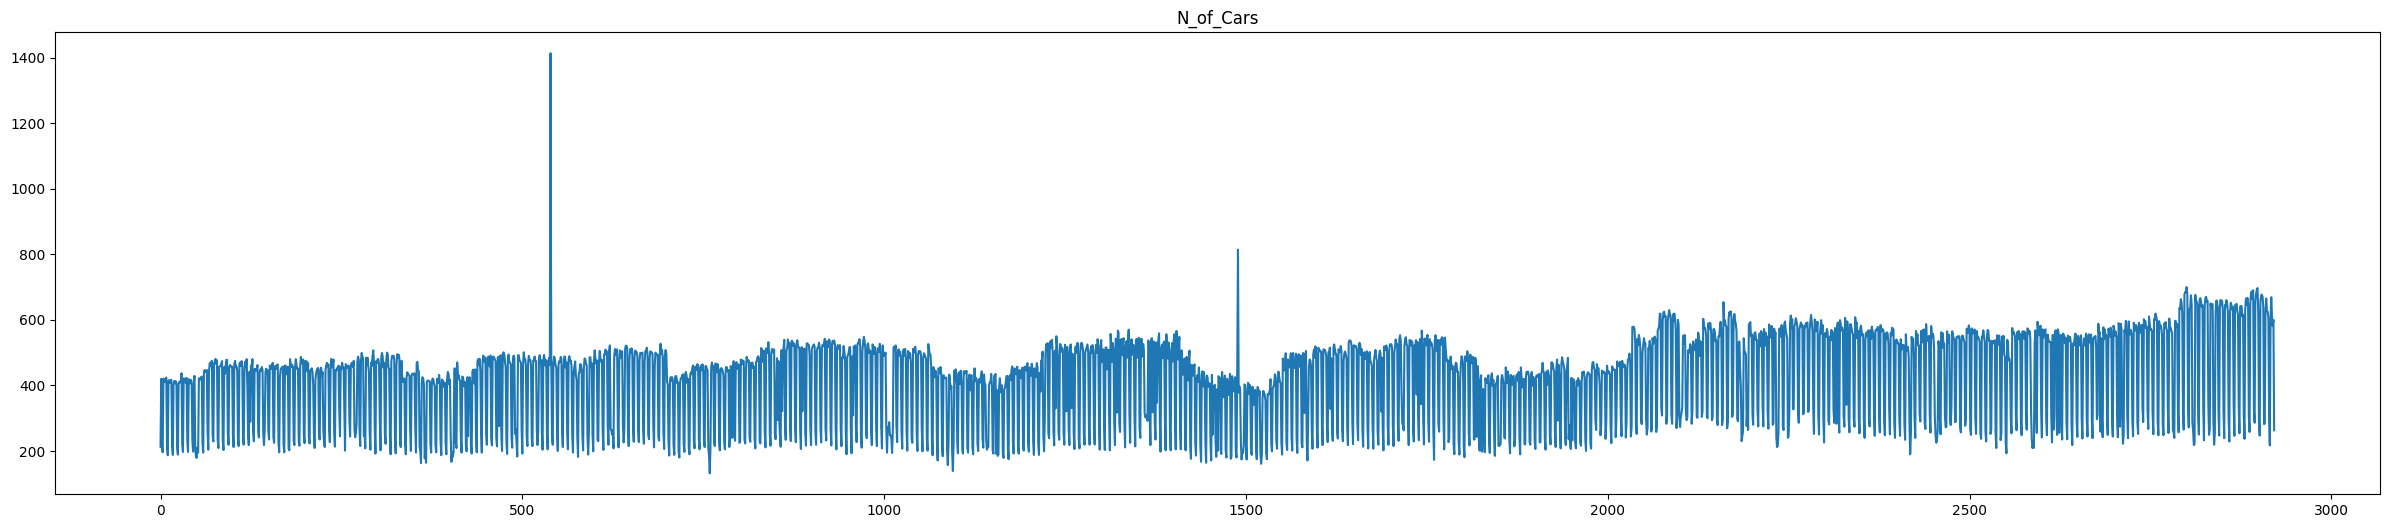

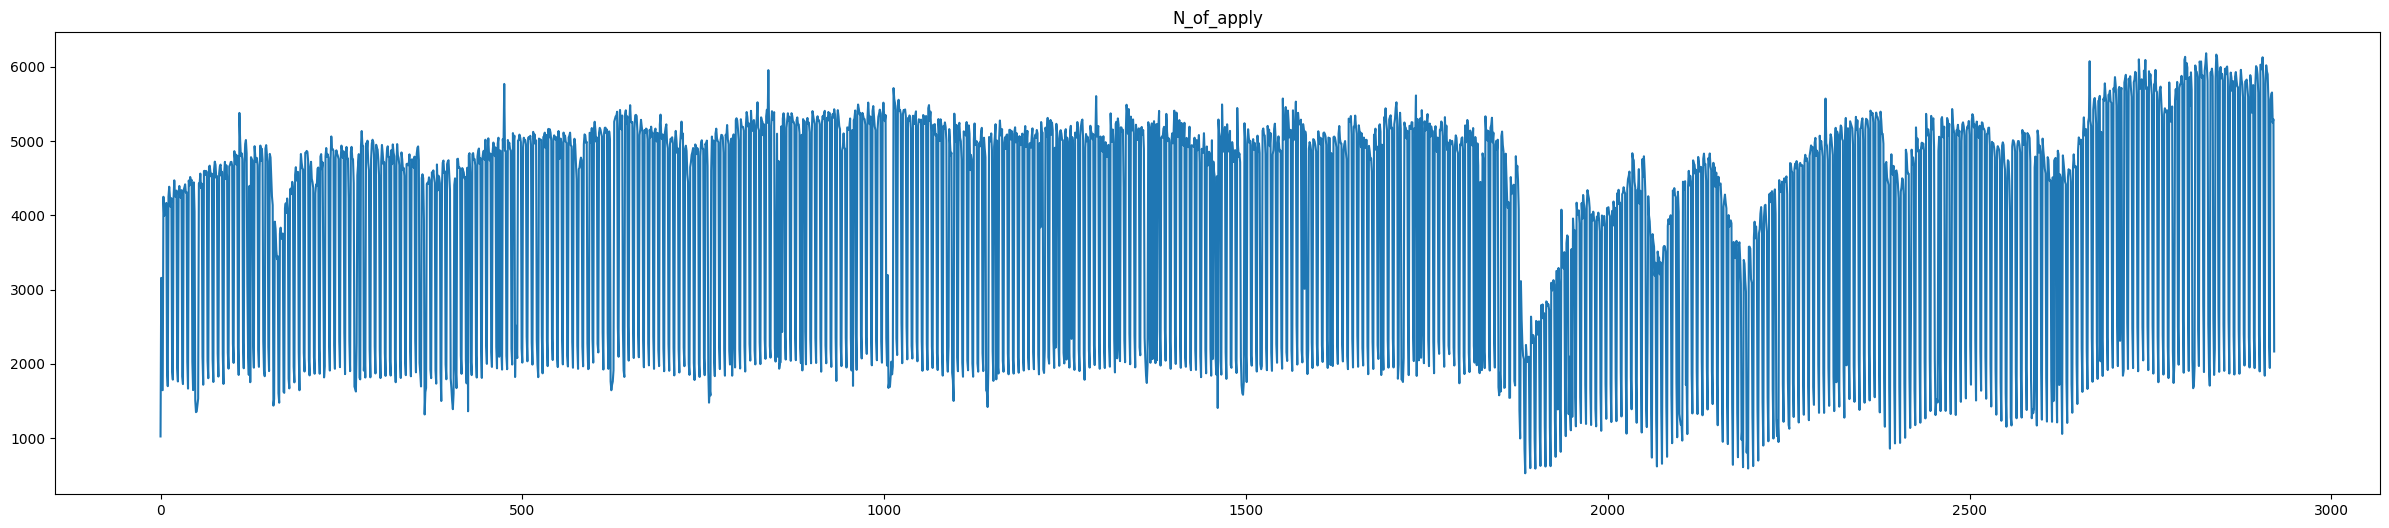

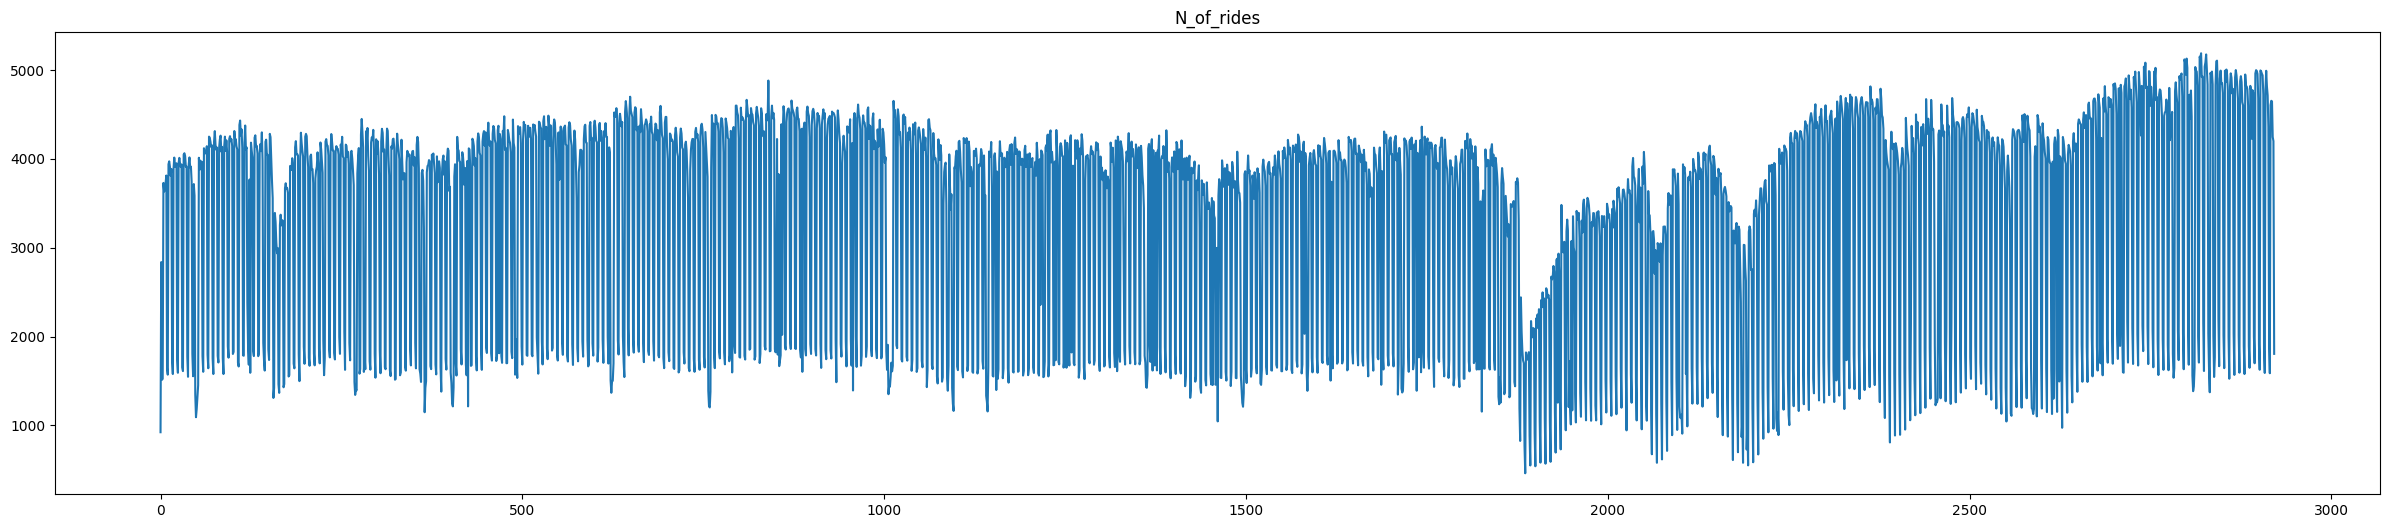

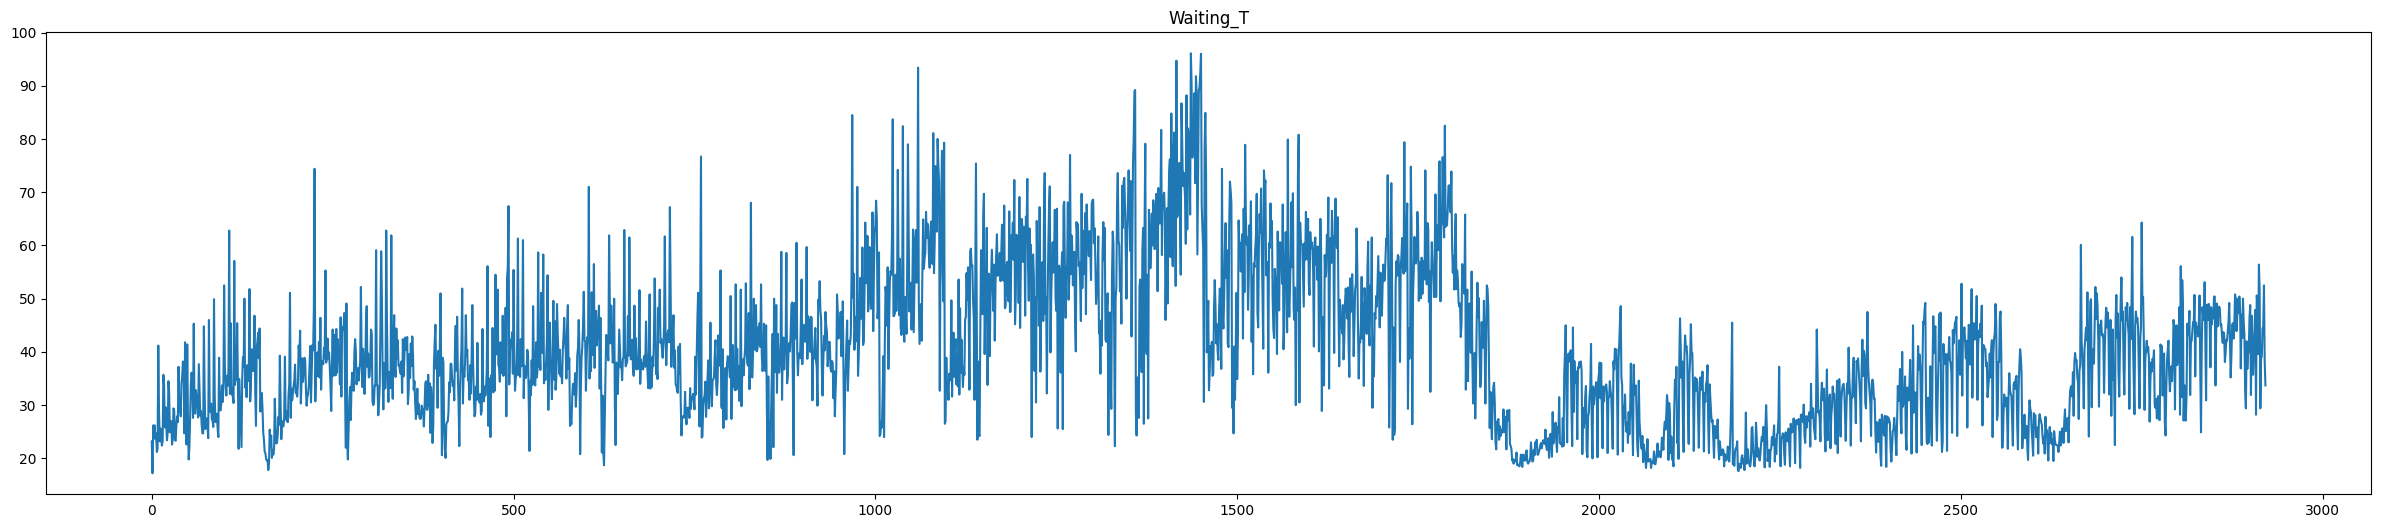

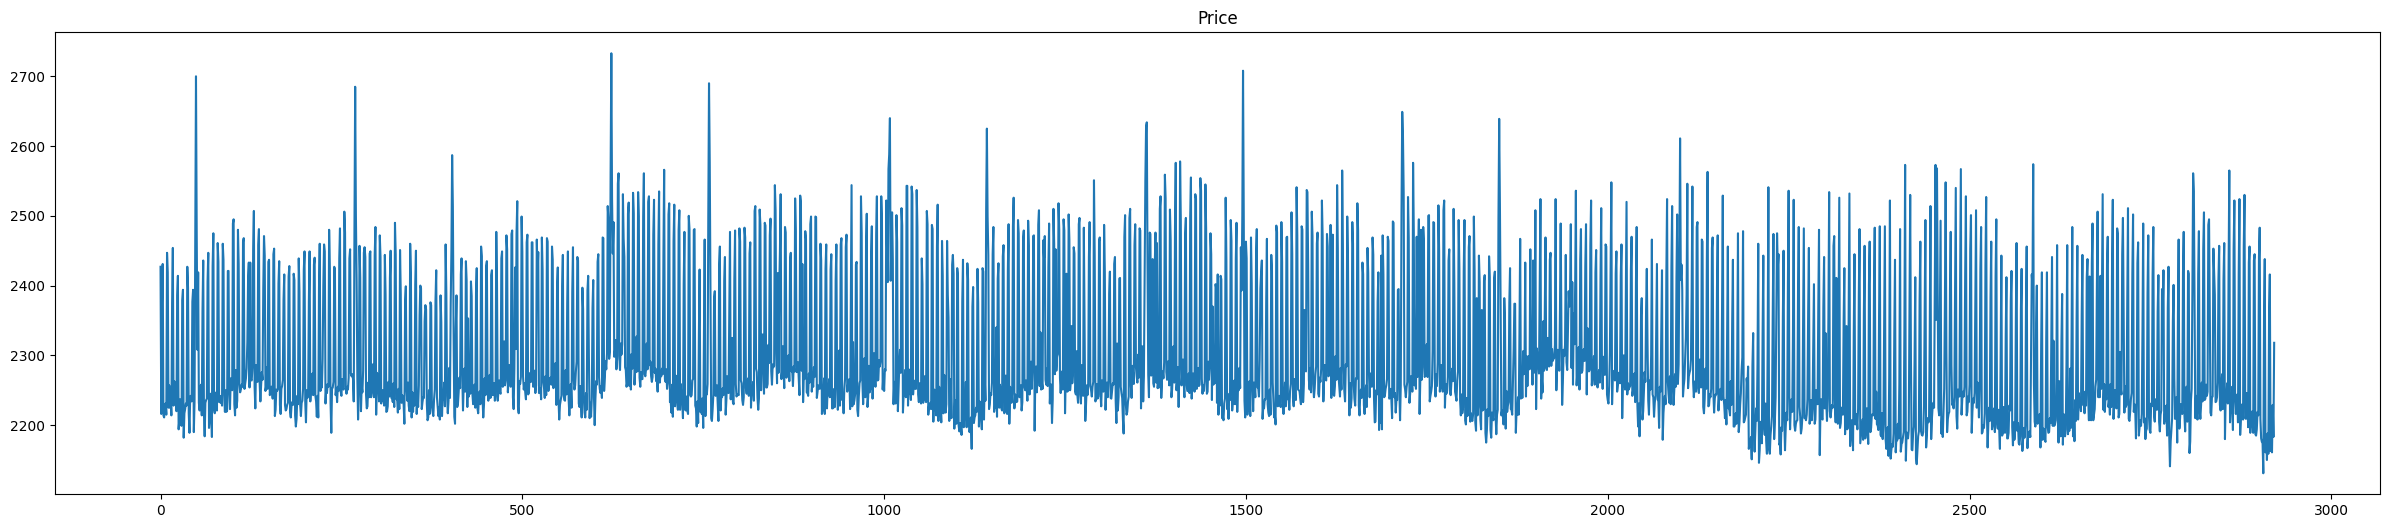

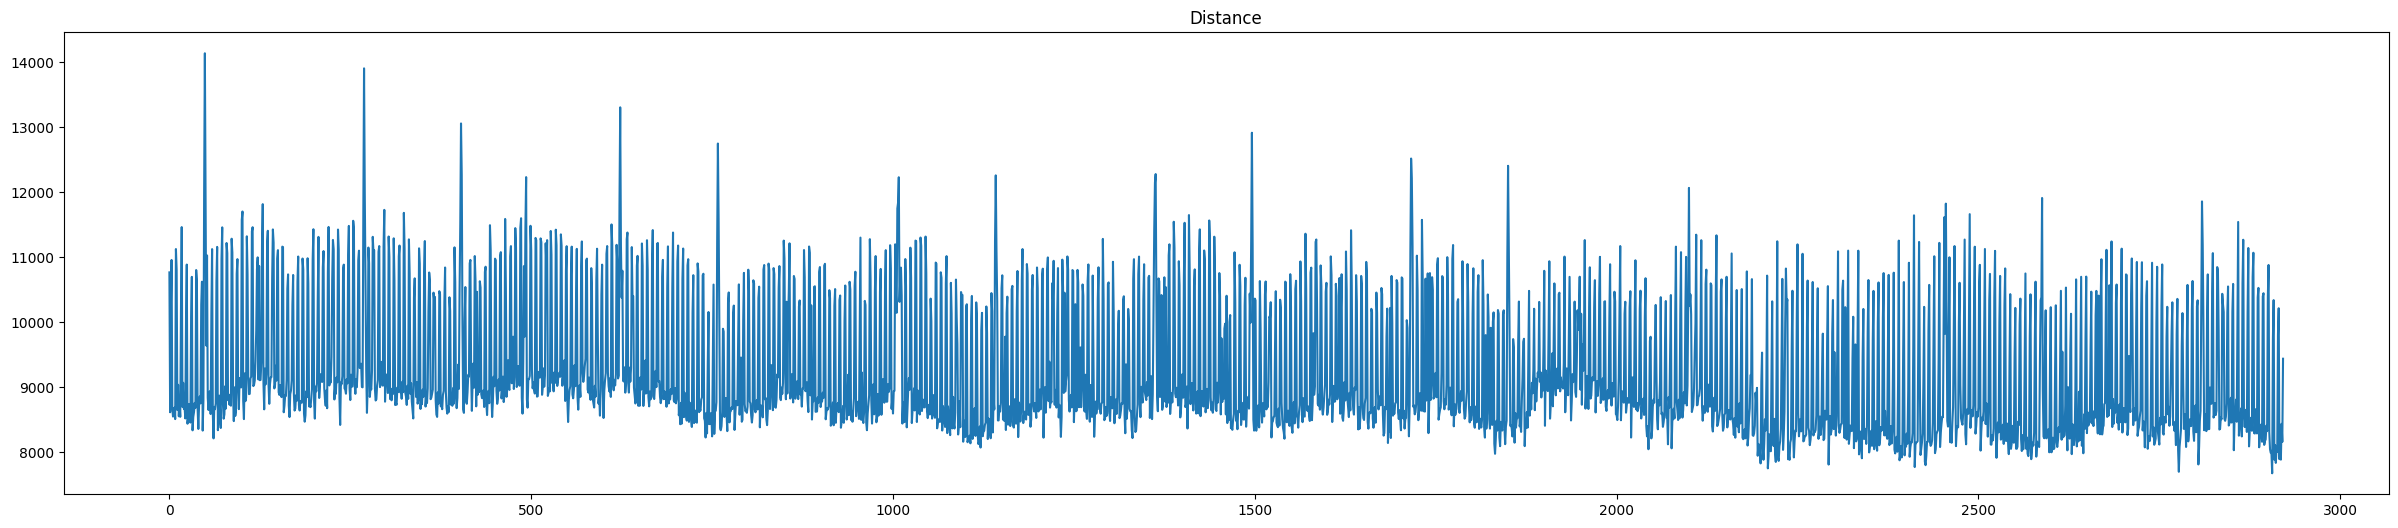

In [ ]:
cols = ['N_of_Cars'	,'N_of_apply',	'N_of_rides',	'Waiting_T'	,'Price',	'Distance'	]
for col in cols:
  plt.figure(figsize=(30, 6))
  plt.plot(df[col])
  plt.title(col)
  plt.show()

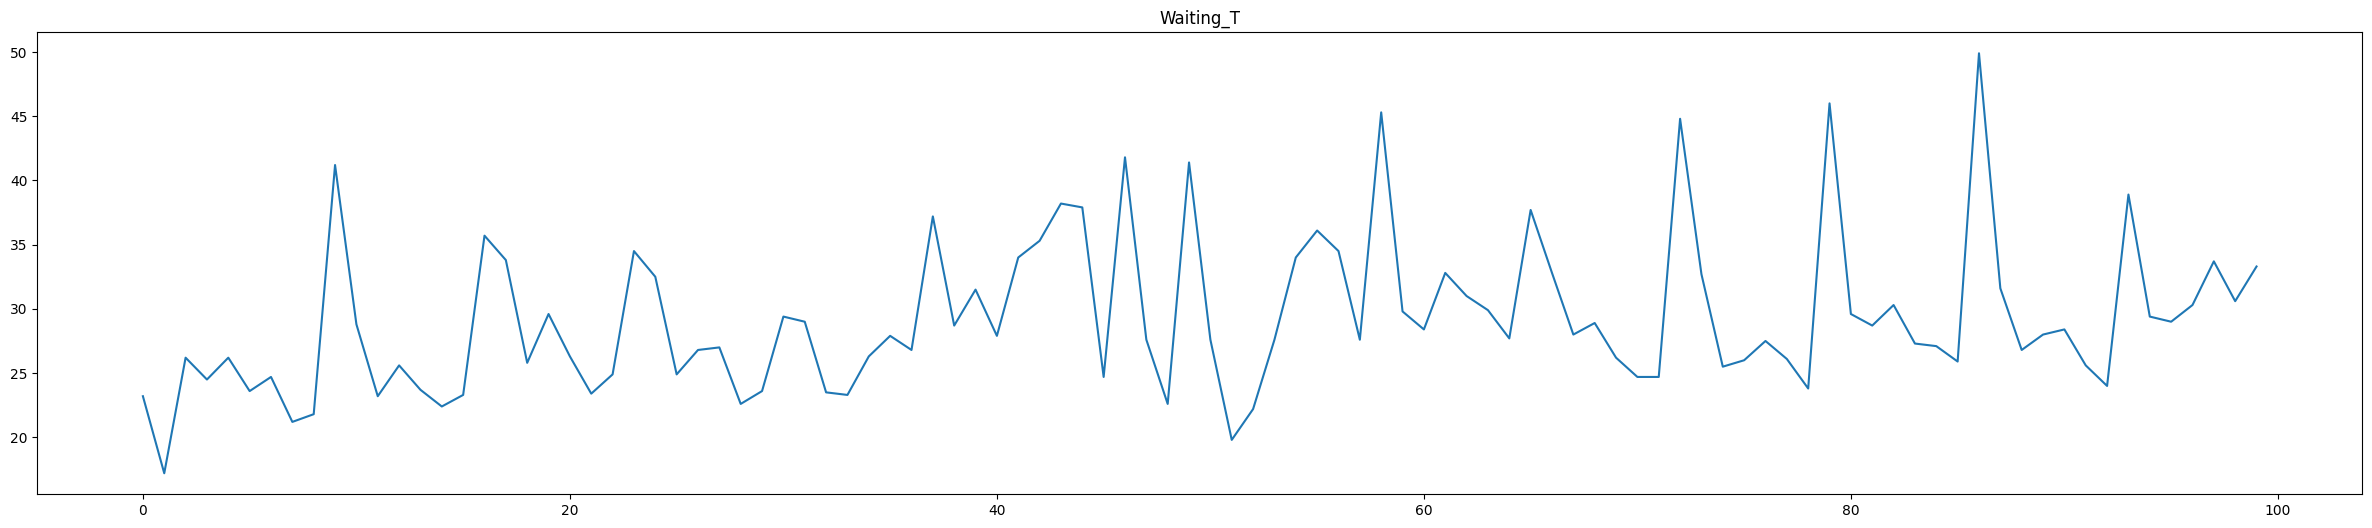

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(df['Waiting_T'].iloc[:100])
plt.title('Waiting_T')
plt.show()

* 접수건, 탑승건

* 대기시간

* 운임

* 이동거리

### (3) 요일별

* 차량 운행수

<ipython-input-73-18e3f6300dad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('day_of_week').mean()[col])


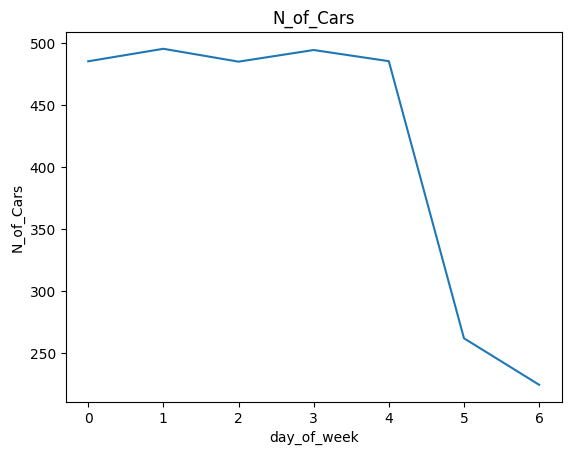

<ipython-input-73-18e3f6300dad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('day_of_week').mean()[col])


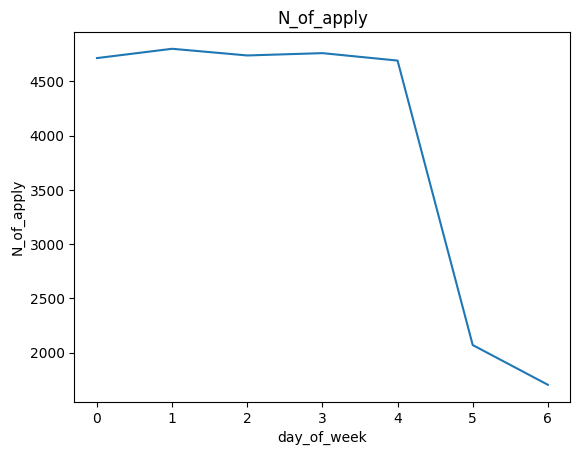

<ipython-input-73-18e3f6300dad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('day_of_week').mean()[col])


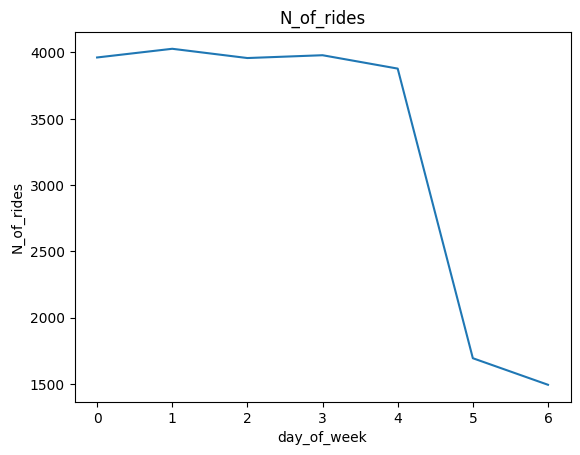

<ipython-input-73-18e3f6300dad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('day_of_week').mean()[col])


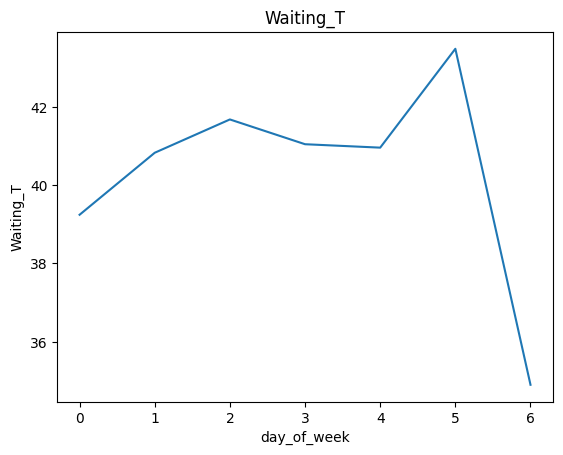

<ipython-input-73-18e3f6300dad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('day_of_week').mean()[col])


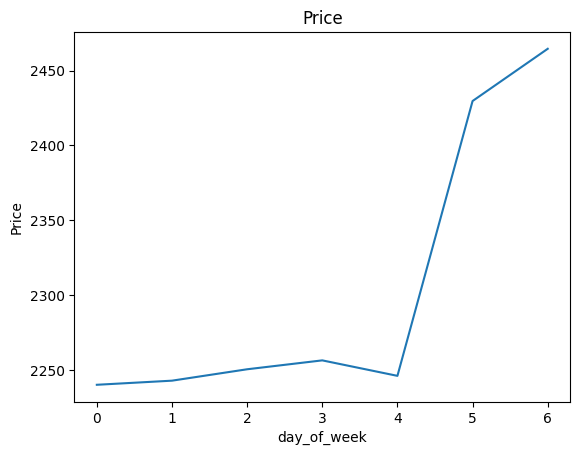

<ipython-input-73-18e3f6300dad>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('day_of_week').mean()[col])


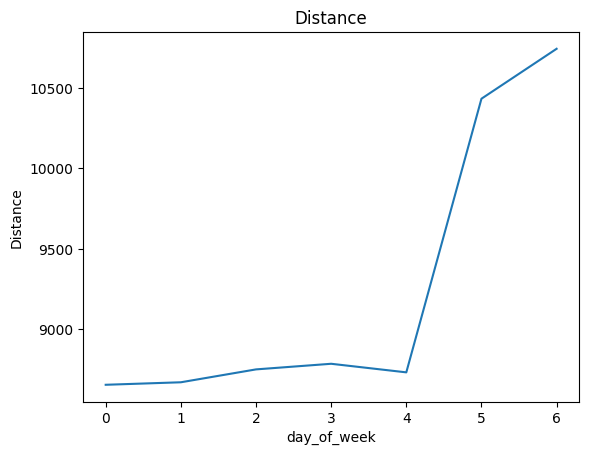

In [ ]:
cols = ['N_of_Cars'	,'N_of_apply',	'N_of_rides',	'Waiting_T'	,'Price',	'Distance'	]
for col in cols:
  sns.lineplot(df.groupby('day_of_week').mean()[col])
  plt.title(col)
  plt.show()

* 접수건, 탑승건

* 대기시간

* 운임

* 이동거리

### (4) 월별

* 차량 운행수

<ipython-input-74-cc1ba693aee9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('month').mean()[col])


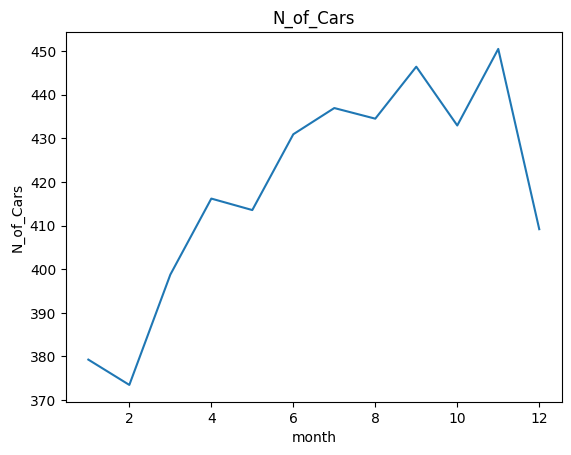

<ipython-input-74-cc1ba693aee9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('month').mean()[col])


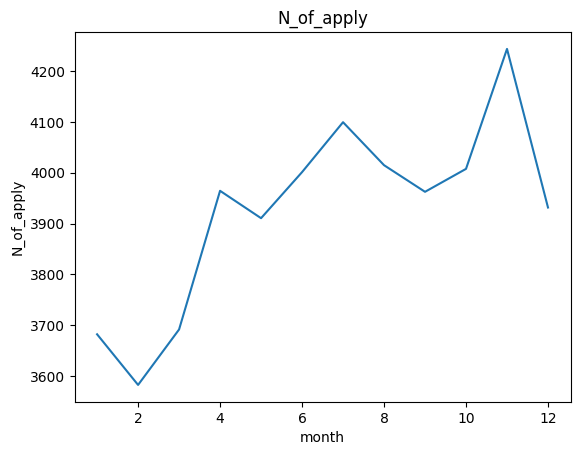

<ipython-input-74-cc1ba693aee9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('month').mean()[col])


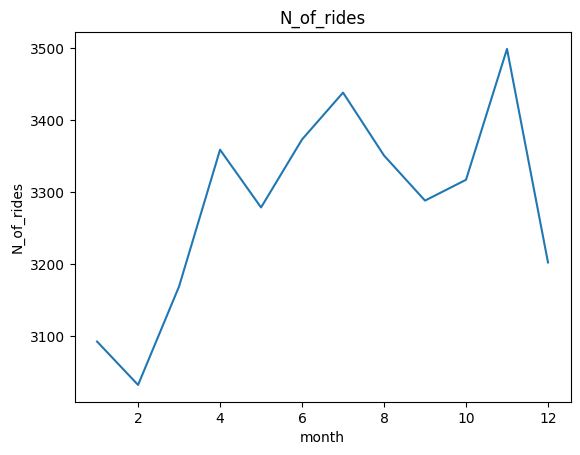

<ipython-input-74-cc1ba693aee9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('month').mean()[col])


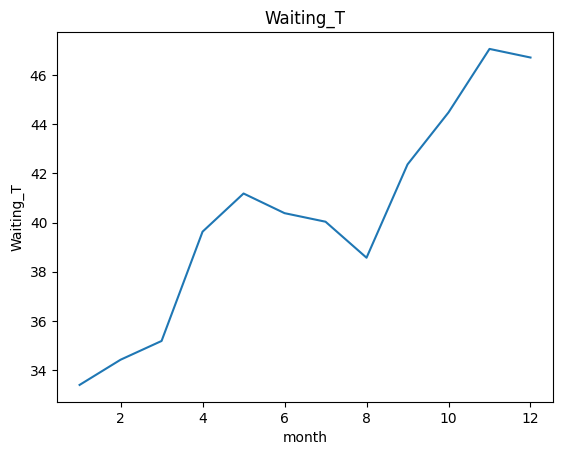

<ipython-input-74-cc1ba693aee9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('month').mean()[col])


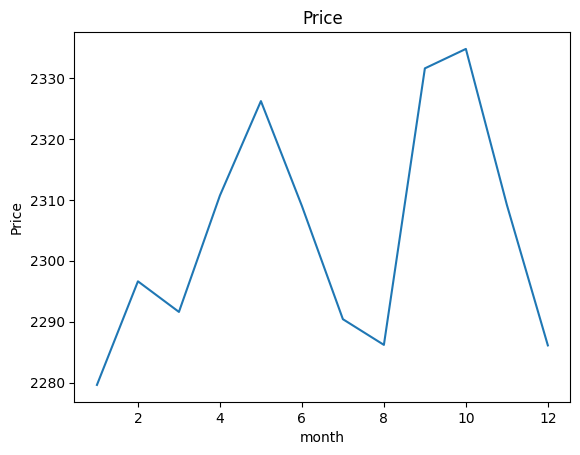

<ipython-input-74-cc1ba693aee9>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('month').mean()[col])


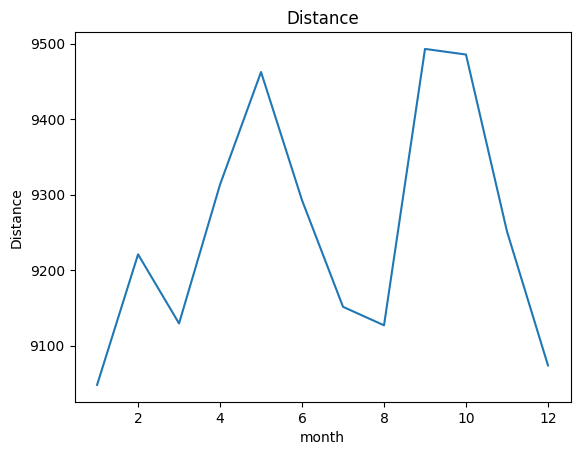

In [ ]:
cols = ['N_of_Cars'	,'N_of_apply',	'N_of_rides',	'Waiting_T'	,'Price',	'Distance'	]
for col in cols:
  sns.lineplot(df.groupby('month').mean()[col])
  plt.title(col)
  plt.show()

* 접수건, 탑승건

* 대기시간

* 운임

* 이동거리

### (5) 연도별

* 차량 운행수

<ipython-input-75-0dab5b7304e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('year').mean()[col])


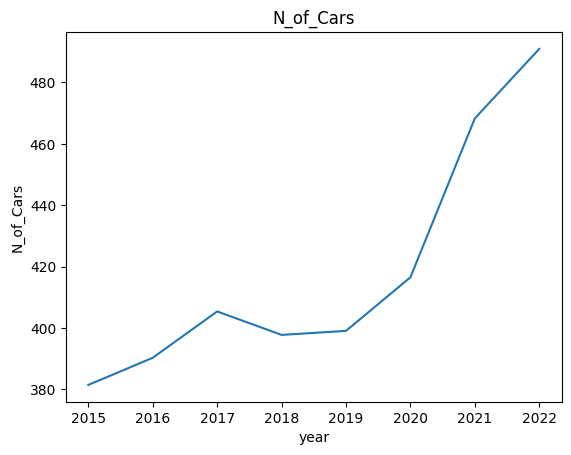

<ipython-input-75-0dab5b7304e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('year').mean()[col])


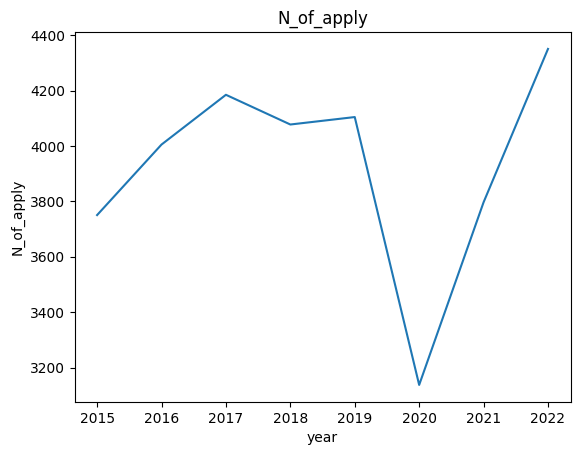

<ipython-input-75-0dab5b7304e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('year').mean()[col])


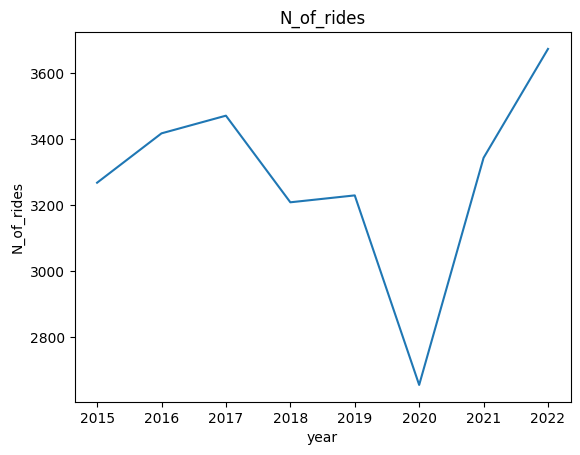

<ipython-input-75-0dab5b7304e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('year').mean()[col])


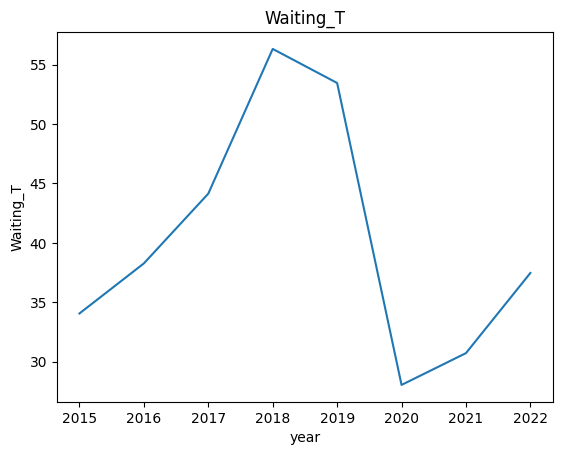

<ipython-input-75-0dab5b7304e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('year').mean()[col])


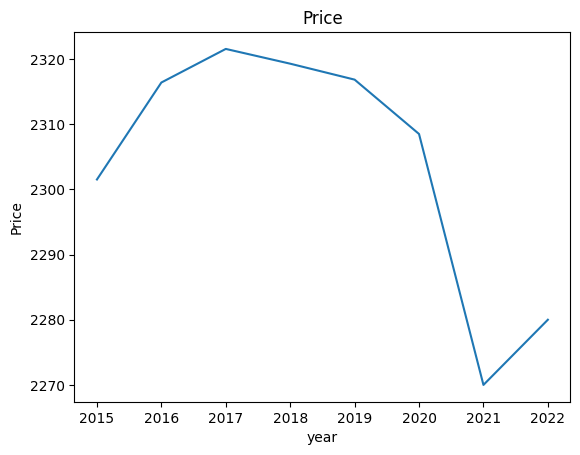

<ipython-input-75-0dab5b7304e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(df.groupby('year').mean()[col])


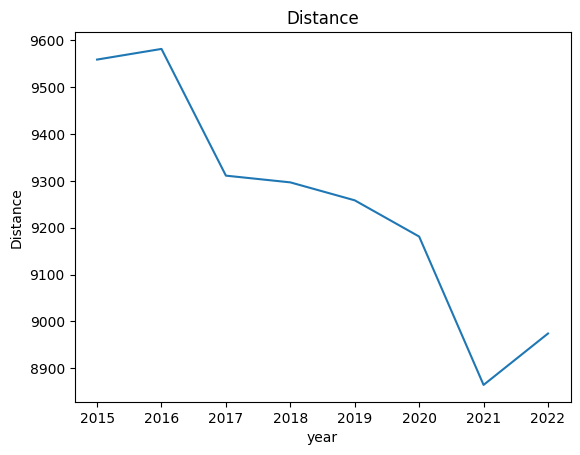

In [ ]:
cols = ['N_of_Cars'	,'N_of_apply',	'N_of_rides',	'Waiting_T'	,'Price',	'Distance'	]
for col in cols:
  sns.lineplot(df.groupby('year').mean()[col])
  plt.title(col)
  plt.show()

* 대기시간

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 : 
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [ ]:
target = df[['Date','Waiting_T']]
target['Waiting_T'] = target['Waiting_T'].shift(-1)
target = target.rename(columns={'Waiting_T':'target'})
target

<ipython-input-134-8cd42563a3f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Waiting_T'] = target['Waiting_T'].shift(-1)


,Date,target
0,2015-01-01,17.2
1,2015-01-02,26.2
2,2015-01-03,24.5
3,2015-01-04,26.2
4,2015-01-05,23.6
...,...,...
2918,2022-12-27,44.8
2919,2022-12-28,52.5
2920,2022-12-29,38.3
2921,2022-12-30,33.7


### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [ ]:
df

,Date,N_of_Cars,N_of_apply,N_of_rides,Waiting_T,Price,Distance,year,month,week,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),day_of_week
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,1,-4.3,-9.8,0.0,52.0,33.0,9.79,3
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,2,-2.0,-8.9,0.0,63.0,28.0,9.07,4
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,3,2.4,-9.2,0.0,73.0,37.0,8.66,5
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,4,8.2,0.2,0.0,89.0,58.0,5.32,6
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,5,7.9,-0.9,0.0,95.0,52.0,6.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,27,3.0,-7.3,0.0,86.0,51.0,10.25,1
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,28,-0.3,-5.4,0.1,92.0,40.0,10.86,2
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,29,1.7,-7.8,0.0,71.0,34.0,10.88,3
2920,2022-12-30,600,5293,4200,38.3,2183,8155,2022,12,52,30,2.1,-4.0,0.0,87.0,38.0,10.84,4


In [ ]:
df['Roll_Waiting_T'] = df['Waiting_T'].rolling(window=7, min_periods=1).mean()

#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [2]:
!pip install workalendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.0 MB/s eta 0:00:00


* 간단 사용법

In [4]:
import pandas as pd
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2017))

,0,1
0,2017-01-01,New year
1,2017-01-27,Korean New Year's Day
2,2017-01-28,Korean New Year's Day
3,2017-01-29,Korean New Year's Day
4,2017-03-01,Independence Day
5,2017-05-03,Buddha's Birthday
6,2017-05-05,Children's Day
7,2017-06-06,Memorial Day
8,2017-08-15,Liberation Day
9,2017-10-03,Midautumn Festival


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

In [ ]:
a = []
for i in range(2015, 2023):
  a.append(pd.DataFrame(cal.holidays(i)))

hol_df = pd.concat(a)

In [ ]:
hol_df[1] = 1

In [ ]:
hol_df.columns = ['Date','holiday']

In [ ]:
hol_df['Date'] = pd.to_datetime(hol_df['Date'])

In [ ]:
df = pd.merge(df, hol_df, on='Date', how='left').fillna(0)

* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

#### 4) 탑승률

In [ ]:
data['Roll_N_of_rides'] = data['N_of_rides'].rolling(window=7, min_periods=1).mean()

## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [ ]:
data = pd.merge(df, target)

In [ ]:
import joblib
joblib.dump(data, '/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/data1.pkl')

['/content/drive/MyDrive/KT_aivle/미니프로젝트6차/장애인콜택시대기시간/data1.pkl']